In [164]:
import sys, os
import random
import numpy as np
import csv
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import seaborn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

# Defining functions for Reading csvs.

In [165]:
def readCSV(fileIn, array):
    inArr=[]
    with open(fileIn, 'r') as file: 
        reader = csv.reader(file)
        next(reader)
        numSamples = 0;
        x = 0
        for lines in reader:
            lines.pop()
            if np.size(lines)!=6:
                print(np.size(lines))
                print(fileIn)
                return -1
            for vals in lines:
              inArr.append(vals)
            x = x + 1 
            if x >= 119:
                numSamples=numSamples+1
                array.append(inArr)
                x = 0 
                inArr = []
        if numSamples != 50:
            print(fileIn)
        return numSamples

def readAudio(fileIn, array):
    with open(fileIn, 'r') as file: 
        reader = csv.reader(file)
        next(reader) 
        x = 0
        for lines in reader:
            lines.pop()
            array.append(lines)

# Functions for training/testing the models

In [166]:

def testPredict(X_train, X_test, y_train, y_test,model):
    model.fit(X_train,y_train)
    ypred = model.predict(X_test)
    plot_confusion_matrix(model, X_test, y_test, cmap='RdPu')
    print(metrics.classification_report(y_test, ypred))
    
def modelLearning(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2)
    model = LogisticRegression()
    print('Logistic model')
    testPredict(X_train, X_test, y_train, y_test,model)
    model = DecisionTreeClassifier()
    print('Decision Tree model')
    testPredict(X_train, X_test, y_train, y_test,model)
    model = RandomForestClassifier()
    print('Random Forest model')
    testPredict(X_train, X_test, y_train, y_test,model)

# Functions for reading my IMU data

In [167]:
X_imu = []
readCSV('/Users/hazel/Desktop/ass2Data/wave_data.csv',X_imu)
readCSV('/Users/hazel/Desktop/ass2Data/fistbump_data.csv',X_imu)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/hazel/Desktop/ass2Data/wave_data.csv'

# Creates the actual labels

In [168]:
y_imu=[]
for x in range(50):
    y_imu.append(0)
for x in range(50):
    y_imu.append(1)

# Stats and models for IMU

In [169]:
modelLearning(X_imu,y_imu)

ValueError: Found input variables with inconsistent numbers of samples: [0, 100]

# Reads audio data

In [170]:
array = []
readAudio('/Users/hazel/Desktop/ass2Data/up.csv',array)
readAudio('/Users/hazel/Desktop/ass2Data/down.csv',array)
readAudio('/Users/hazel/Desktop/ass2Data/stop.csv',array)
readAudio('/Users/hazel/Desktop/ass2Data/go.csv',array)
y_audio = []
for x in range(4):
    for num in range(25):
        y_audio.append(x)
np.shape(array)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/hazel/Desktop/ass2Data/up.csv'

# Models and stats

In [171]:
modelLearning(array,y_audio)

ValueError: Found input variables with inconsistent numbers of samples: [0, 1900]

# Reads directory for IMU data, creates Y

In [172]:
imuArr = []
y_imu=[]
x = 0
for root, directories, files in os.walk('/Users/hazel/Desktop/IMU', topdown=False):
    for name in files:
        length = readCSV(os.path.join(root, name), imuArr)
        if 'f' in name:
            for length in range(50):
                y_imu.append(0)
        else:
            for length in range(50):
                y_imu.append(1)

# Models and outputs

Logistic model


C:\Users\hazel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hazel\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\hazel\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to deci

              precision    recall  f1-score   support

           0       0.65      0.81      0.72       154
           1       0.86      0.73      0.79       246

    accuracy                           0.76       400
   macro avg       0.75      0.77      0.76       400
weighted avg       0.78      0.76      0.76       400

Decision Tree model
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       154
           1       0.95      0.96      0.95       246

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400

Random Forest model
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       154
           1       0.98      0.97      0.98       246

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97 

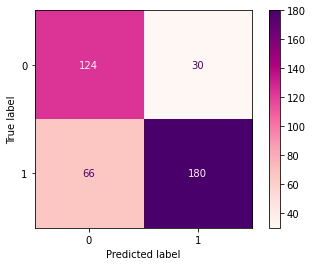

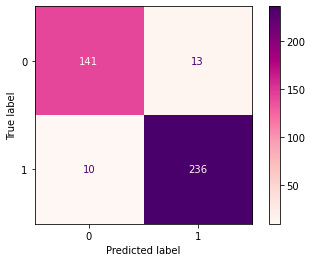

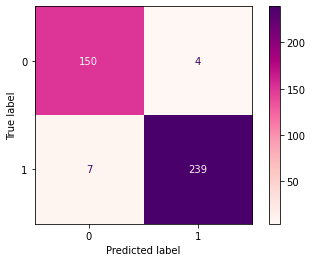

In [173]:
modelLearning(imuArr, y_imu)

# This collects the audio files and labels them

In [174]:
audioArr = []
y_audio = []
up = 0
down = 0
stop = 0
go = 0
other = 0
for root, directories, files in os.walk('/Users/hazel/Desktop/Audio', topdown=False):
    for name in files:
        name = name.lower()
        if 'down' in name:
            down = down + 1
            readAudio(os.path.join(root, name),audioArr)
            for length in range(25):
                y_audio.append(0)
        elif 'go' in name:
            go = go + 1
            readAudio(os.path.join(root, name),audioArr)
            for length in range(25):
                y_audio.append(1)
        elif 'stop' in name:
            stop = stop + 1
            readAudio(os.path.join(root, name),audioArr)
            for length in range(25):
                y_audio.append(2)
        elif 'up' in name:
            up = up + 1
            readAudio(os.path.join(root, name),audioArr)
            for length in range(25):
                y_audio.append(3)
        else:
            other = other + 1
print("up: {}".format(up))
print("down: {}".format(down))
print("stop: {}".format(stop))
print("go: {}".format(go))
print("other: {}".format(other))
print(np.size(y_audio))
print(np.shape(audioArr))

up: 19
down: 19
stop: 19
go: 19
other: 0
1900
(1900, 64)


# Creates models and output

Logistic model
              precision    recall  f1-score   support

           0       0.41      0.27      0.33       104
           1       0.32      0.31      0.32        97
           2       0.33      0.54      0.41        84
           3       0.51      0.43      0.47        95

    accuracy                           0.38       380
   macro avg       0.39      0.39      0.38       380
weighted avg       0.39      0.38      0.38       380

Decision Tree model


C:\Users\hazel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hazel\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\hazel\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to deci

              precision    recall  f1-score   support

           0       0.56      0.60      0.58       104
           1       0.50      0.48      0.49        97
           2       0.42      0.48      0.45        84
           3       0.51      0.43      0.47        95

    accuracy                           0.50       380
   macro avg       0.50      0.50      0.50       380
weighted avg       0.50      0.50      0.50       380

Random Forest model
              precision    recall  f1-score   support

           0       0.67      0.73      0.70       104
           1       0.59      0.57      0.58        97
           2       0.57      0.56      0.57        84
           3       0.62      0.59      0.61        95

    accuracy                           0.62       380
   macro avg       0.61      0.61      0.61       380
weighted avg       0.61      0.62      0.61       380



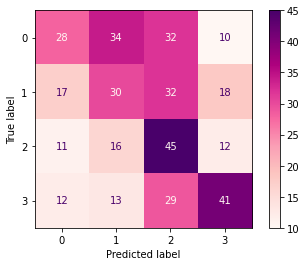

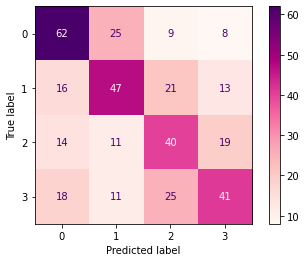

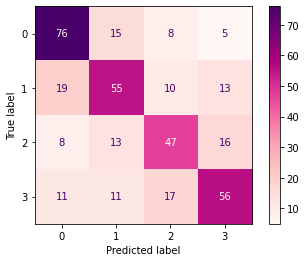

In [175]:
modelLearning(audioArr,y_audio)